# EDA

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("RTA Dataset.csv")

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

array([[<AxesSubplot: title={'center': 'Number_of_vehicles_involved'}>,
        <AxesSubplot: title={'center': 'Number_of_casualties'}>]],
      dtype=object)

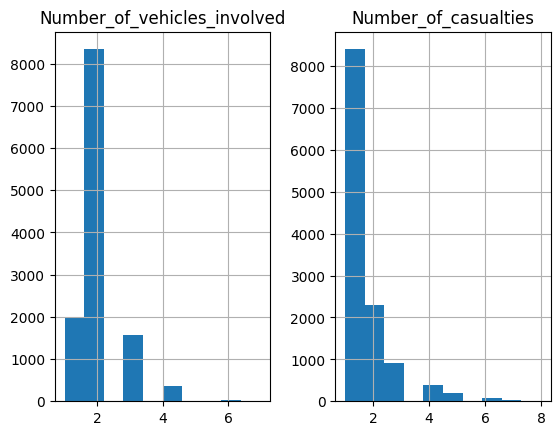

In [5]:
df.hist()

In [6]:
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [7]:
df['Day_of_week'].nunique()

7

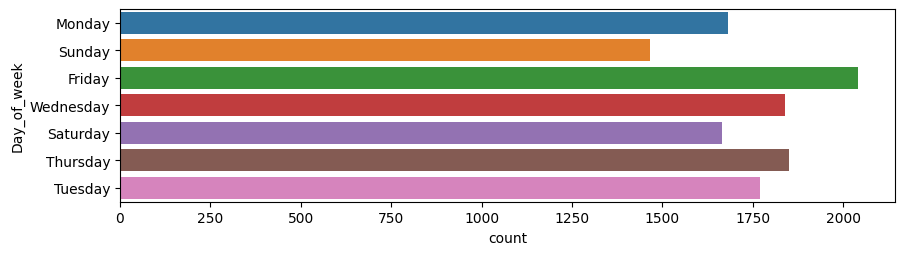

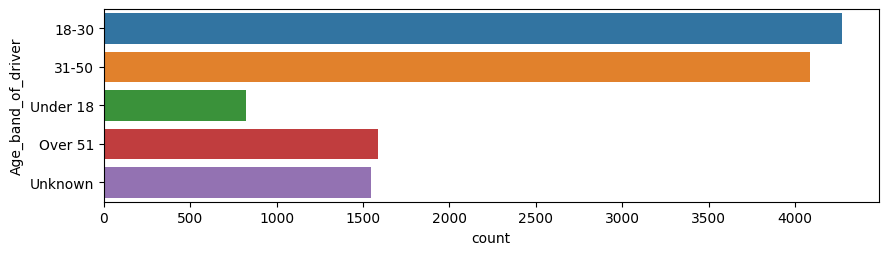

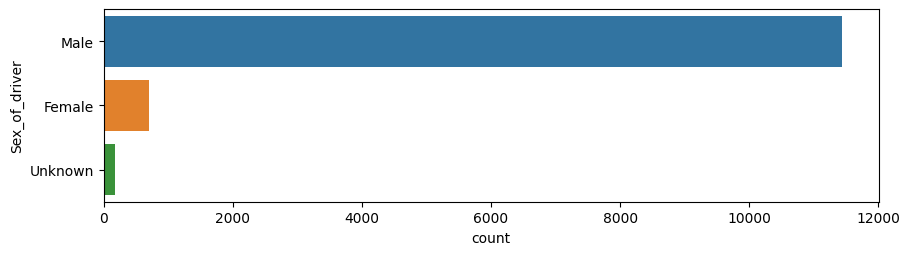

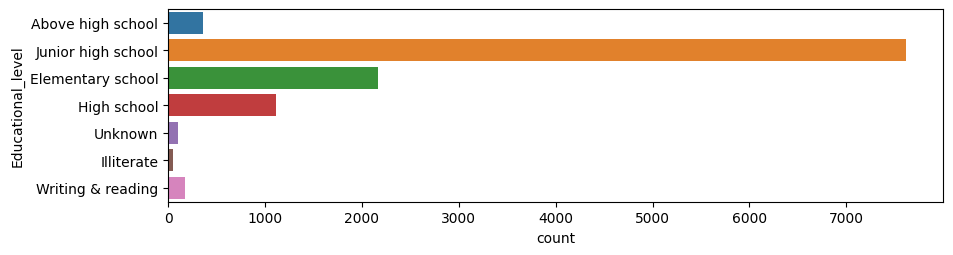

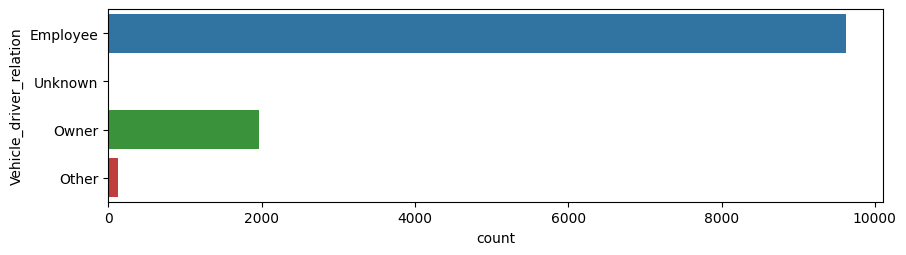

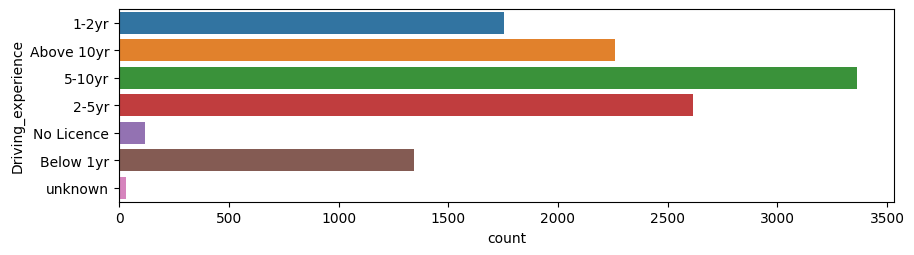

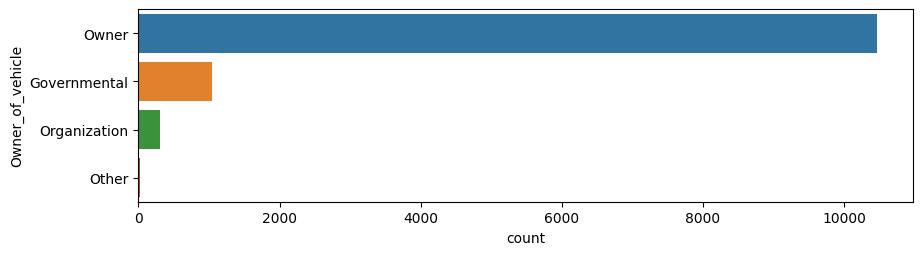

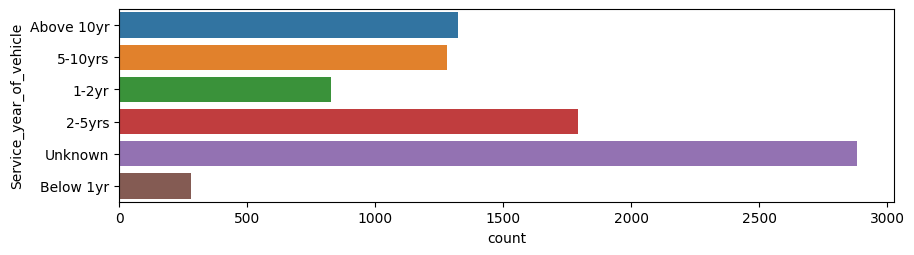

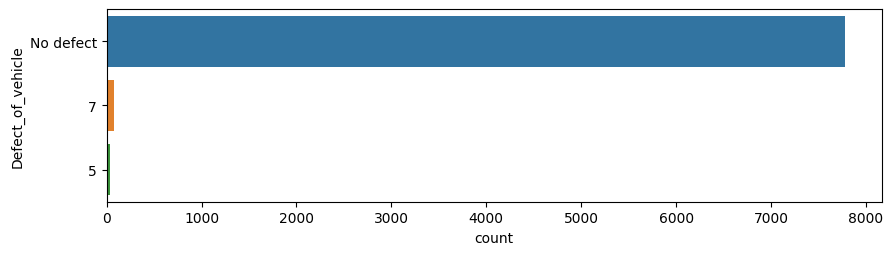

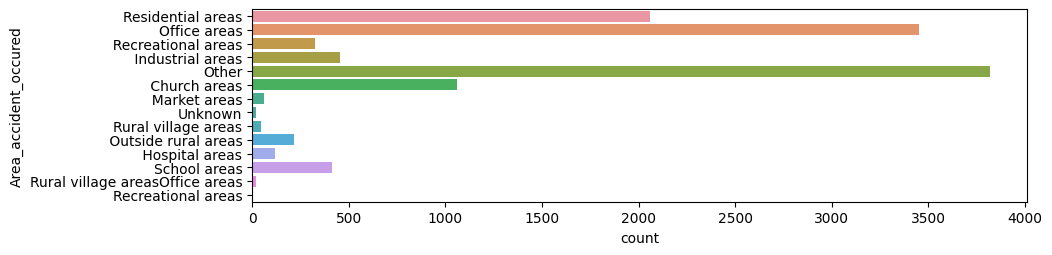

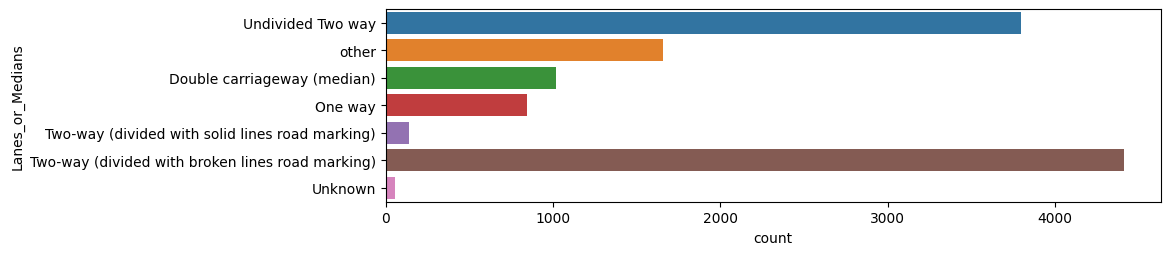

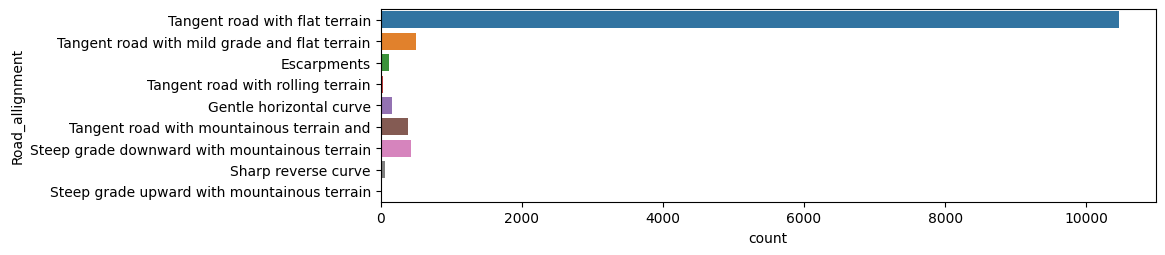

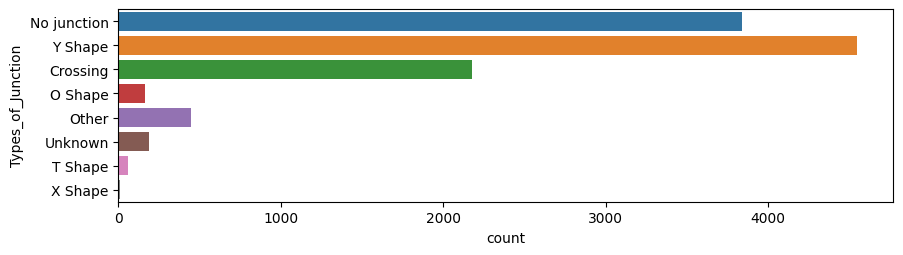

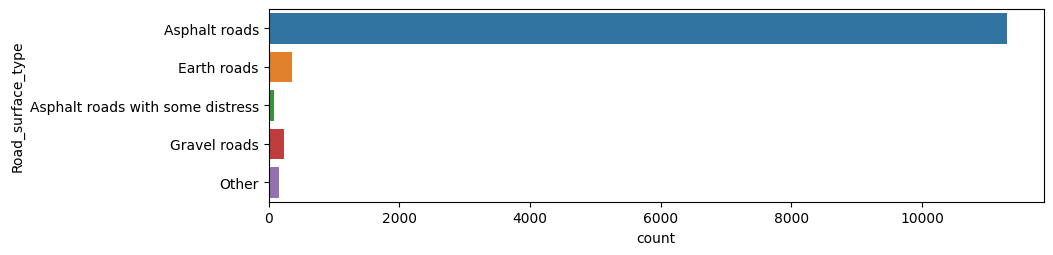

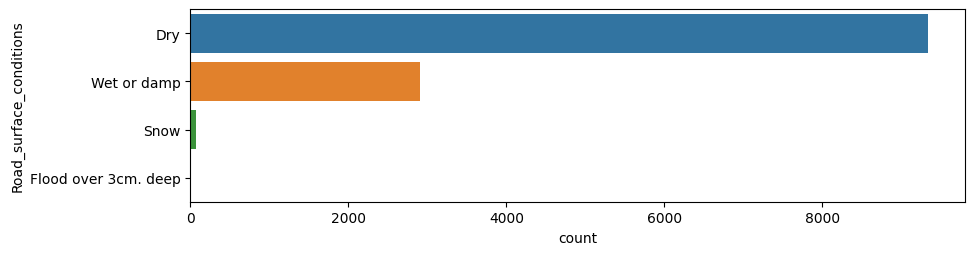

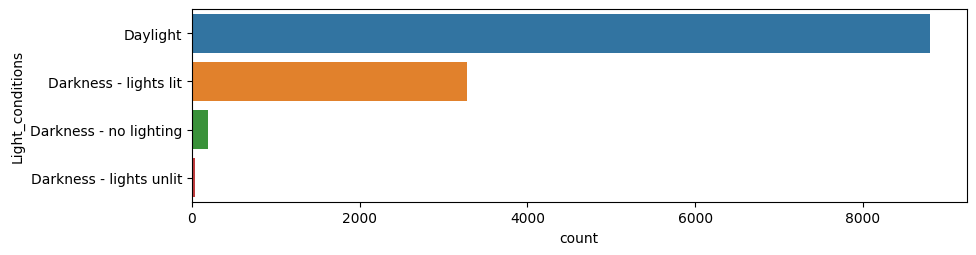

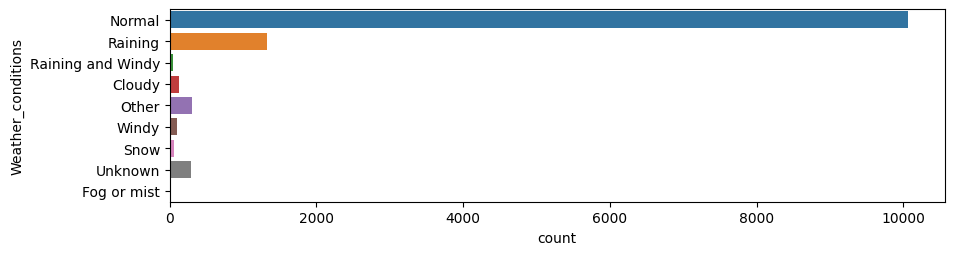

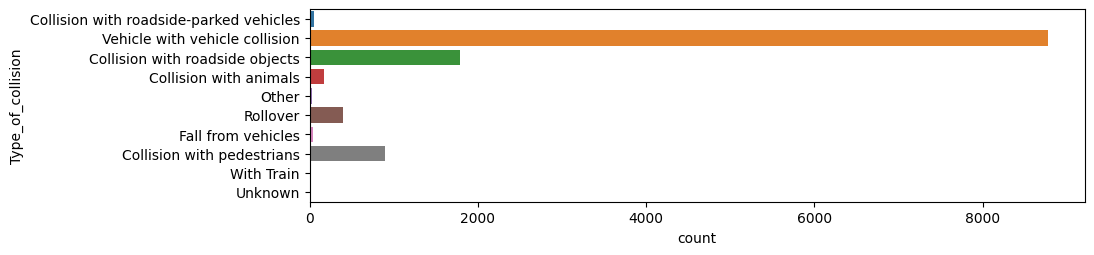

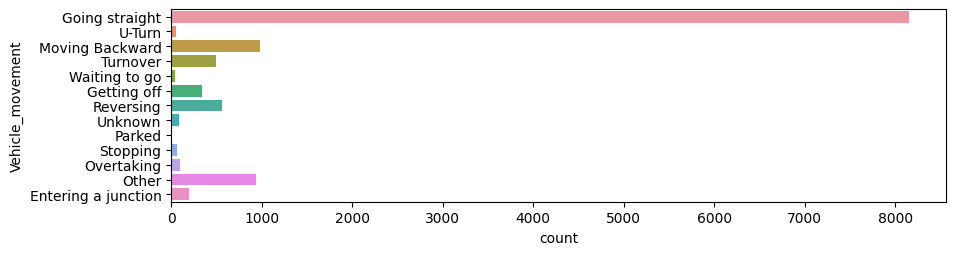

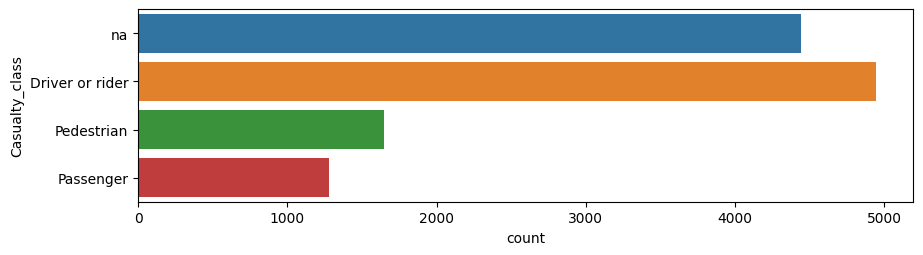

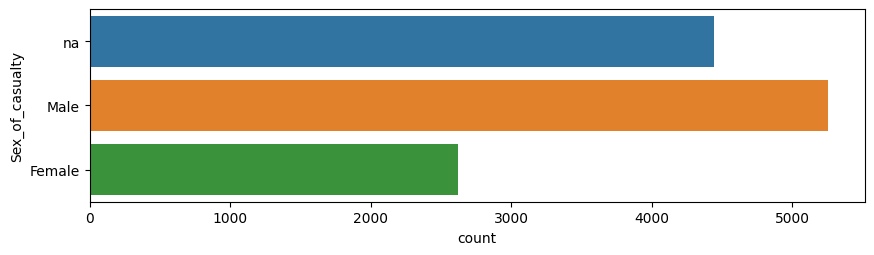

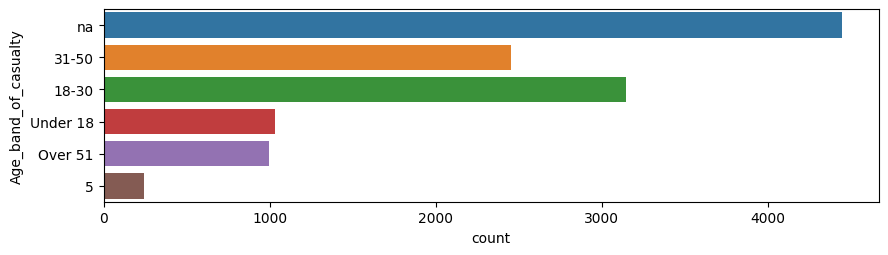

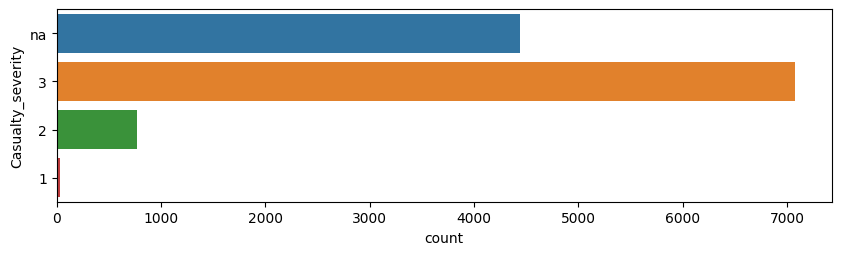

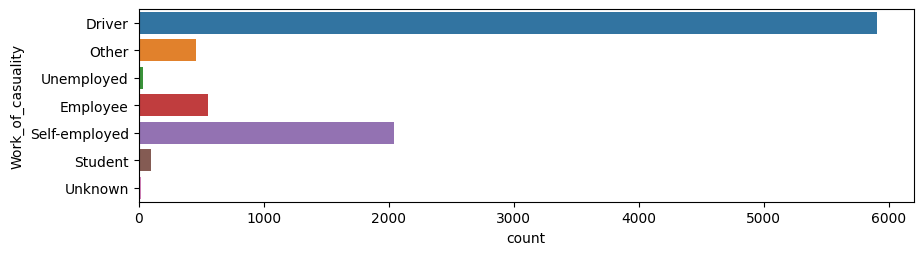

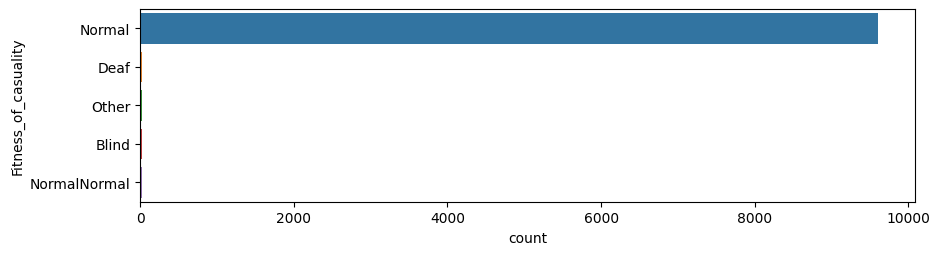

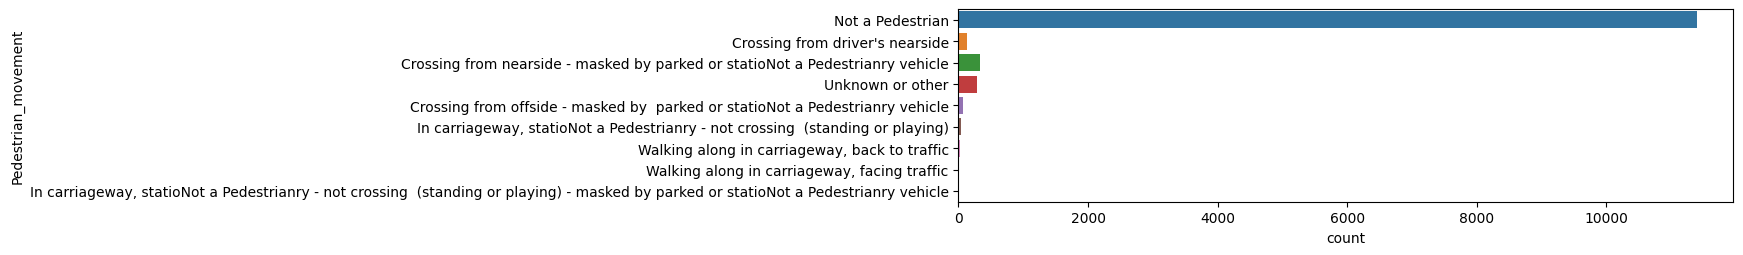

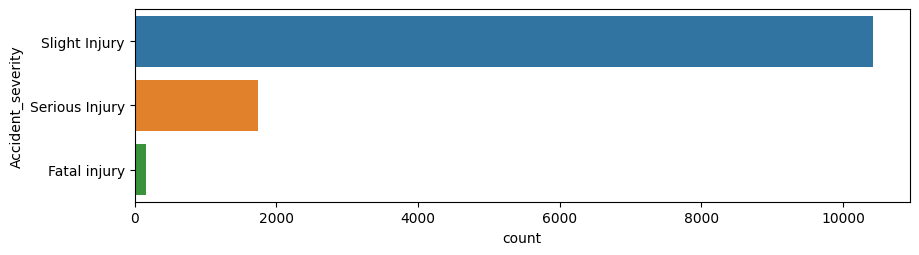

In [8]:
for col in df.select_dtypes(include='object'):
    if len(df[col].unique())<=15:
        plt.figure(figsize=(10,2.5))
        sns.countplot(y=col,data=df)
        plt.show()

In [9]:
df['Time'].unique


<bound method Series.unique of 0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object>

In [10]:
for col in df.select_dtypes(include="object"):
    if df[col].nunique()<10:
         display(pd.crosstab(df['Accident_severity'], df[col],margins=True))
        

Day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
Accident_severity,,,,,,,,
Fatal injury,16,12,37,35,22,17,19,158
Serious Injury,313,204,245,190,272,257,262,1743
Slight Injury,1712,1465,1384,1242,1557,1496,1559,10415
All,2041,1681,1666,1467,1851,1770,1840,12316


Age_band_of_driver,18-30,31-50,Over 51,Under 18,Unknown,All
Accident_severity,,,,,,
Fatal injury,62,54,24,12,6,158
Serious Injury,604,541,257,169,172,1743
Slight Injury,3605,3492,1304,644,1370,10415
All,4271,4087,1585,825,1548,12316


Sex_of_driver,Female,Male,Unknown,All
Accident_severity,,,,
Fatal injury,5,152,1,158
Serious Injury,104,1621,18,1743
Slight Injury,592,9664,159,10415
All,701,11437,178,12316


Educational_level,Above high school,Elementary school,High school,Illiterate,Junior high school,Unknown,Writing & reading,All
Accident_severity,,,,,,,,
Fatal injury,5,24,15,0,97,0,3,144
Serious Injury,53,314,146,6,1083,20,22,1644
Slight Injury,304,1825,949,39,6439,80,151,9787
All,362,2163,1110,45,7619,100,176,11575


Vehicle_driver_relation,Employee,Other,Owner,Unknown,All
Accident_severity,,,,,
Fatal injury,114,1,34,0,149
Serious Injury,1357,14,287,1,1659
Slight Injury,8156,108,1652,13,9929
All,9627,123,1973,14,11737


Driving_experience,1-2yr,2-5yr,5-10yr,Above 10yr,Below 1yr,No Licence,unknown,All
Accident_severity,,,,,,,,
Fatal injury,21,46,41,29,7,0,1,145
Serious Injury,228,381,462,323,207,13,6,1620
Slight Injury,1507,2186,2860,1910,1128,105,26,9722
All,1756,2613,3363,2262,1342,118,33,11487


Owner_of_vehicle,Governmental,Organization,Other,Owner,All
Accident_severity,,,,,
Fatal injury,16,4,0,133,153
Serious Injury,131,38,1,1502,1672
Slight Injury,894,270,21,8824,10009
All,1041,312,22,10459,11834


Service_year_of_vehicle,1-2yr,2-5yrs,5-10yrs,Above 10yr,Below 1yr,Unknown,All
Accident_severity,,,,,,,
Fatal injury,9,28,16,12,6,44,115
Serious Injury,111,253,191,186,43,408,1192
Slight Injury,707,1511,1073,1126,233,2431,7081
All,827,1792,1280,1324,282,2883,8388


Defect_of_vehicle,5,7,No defect,All
Accident_severity,,,,
Fatal injury,0,0,105,105
Serious Injury,6,14,1125,1145
Slight Injury,30,62,6547,6639
All,36,76,7777,7889


Lanes_or_Medians,Double carriageway (median),One way,Two-way (divided with broken lines road marking),Two-way (divided with solid lines road marking),Undivided Two way,Unknown,other,All
Accident_severity,,,,,,,,
Fatal injury,7,12,49,1,62,0,22,153
Serious Injury,132,114,656,21,524,6,242,1695
Slight Injury,881,719,3706,120,3210,51,1396,10083
All,1020,845,4411,142,3796,57,1660,11931


Road_allignment,Escarpments,Gentle horizontal curve,Sharp reverse curve,Steep grade downward with mountainous terrain,Steep grade upward with mountainous terrain,Tangent road with flat terrain,Tangent road with mild grade and flat terrain,Tangent road with mountainous terrain and,Tangent road with rolling terrain,All
Accident_severity,,,,,,,,,,
Fatal injury,1,3,0,4,1,140,2,4,1,156
Serious Injury,14,20,9,63,5,1466,77,61,6,1721
Slight Injury,98,140,48,362,13,8853,422,331,30,10297
All,113,163,57,429,19,10459,501,396,37,12174


Types_of_Junction,Crossing,No junction,O Shape,Other,T Shape,Unknown,X Shape,Y Shape,All
Accident_severity,,,,,,,,,
Fatal injury,12,71,1,2,0,2,0,53,141
Serious Injury,245,581,26,83,7,26,0,633,1601
Slight Injury,1920,3185,137,360,53,163,12,3857,9687
All,2177,3837,164,445,60,191,12,4543,11429


Road_surface_type,Asphalt roads,Asphalt roads with some distress,Earth roads,Gravel roads,Other,All
Accident_severity,,,,,,
Fatal injury,148,1,7,0,1,157
Serious Injury,1593,7,49,45,26,1720
Slight Injury,9555,73,302,197,140,10267
All,11296,81,358,242,167,12144


Road_surface_conditions,Dry,Flood over 3cm. deep,Snow,Wet or damp,All
Accident_severity,,,,,
Fatal injury,121,0,0,37,158
Serious Injury,1332,0,4,407,1743
Slight Injury,7887,2,66,2460,10415
All,9340,2,70,2904,12316


Light_conditions,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,All
Accident_severity,,,,,
Fatal injury,66,0,5,87,158
Serious Injury,465,7,49,1222,1743
Slight Injury,2755,33,138,7489,10415
All,3286,40,192,8798,12316


Weather_conditions,Cloudy,Fog or mist,Normal,Other,Raining,Raining and Windy,Snow,Unknown,Windy,All
Accident_severity,,,,,,,,,,
Fatal injury,0,0,135,0,23,0,0,0,0,158
Serious Injury,8,1,1474,28,158,2,5,51,16,1743
Slight Injury,117,9,8454,268,1150,38,56,241,82,10415
All,125,10,10063,296,1331,40,61,292,98,12316


Casualty_class,Driver or rider,Passenger,Pedestrian,na,All
Accident_severity,,,,,
Fatal injury,71,12,27,48,158
Serious Injury,719,182,228,614,1743
Slight Injury,4154,1086,1394,3781,10415
All,4944,1280,1649,4443,12316


Sex_of_casualty,Female,Male,na,All
Accident_severity,,,,
Fatal injury,29,81,48,158
Serious Injury,361,768,614,1743
Slight Injury,2230,4404,3781,10415
All,2620,5253,4443,12316


Age_band_of_casualty,18-30,31-50,5,Over 51,Under 18,na,All
Accident_severity,,,,,,,
Fatal injury,51,27,3,16,13,48,158
Serious Injury,487,349,44,123,126,614,1743
Slight Injury,2607,2079,197,855,896,3781,10415
All,3145,2455,244,994,1035,4443,12316


Casualty_severity,1,2,3,na,All
Accident_severity,,,,,
Fatal injury,0,10,100,48,158
Serious Injury,3,98,1028,614,1743
Slight Injury,23,663,5948,3781,10415
All,26,771,7076,4443,12316


Work_of_casuality,Driver,Employee,Other,Self-employed,Student,Unemployed,Unknown,All
Accident_severity,,,,,,,,
Fatal injury,80,4,5,27,0,0,0,116
Serious Injury,824,90,71,274,19,7,2,1287
Slight Injury,4999,459,387,1743,84,26,17,7715
All,5903,553,463,2044,103,33,19,9118


Fitness_of_casuality,Blind,Deaf,Normal,NormalNormal,Other,All
Accident_severity,,,,,,
Fatal injury,0,0,126,0,1,127
Serious Injury,1,4,1361,4,4,1374
Slight Injury,17,14,8121,15,13,8180
All,18,18,9608,19,18,9681


Pedestrian_movement,Crossing from driver's nearside,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Not a Pedestrian,Unknown or other,"Walking along in carriageway, back to traffic","Walking along in carriageway, facing traffic",All
Accident_severity,,,,,,,,,,
Fatal injury,1,7,1,0,0,142,7,0,0,158
Serious Injury,28,51,10,5,0,1606,40,3,0,1743
Slight Injury,111,279,61,41,13,9642,246,15,7,10415
All,140,337,72,46,13,11390,293,18,7,12316


Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Accident_severity,,,,
Fatal injury,158,0,0,158
Serious Injury,0,1743,0,1743
Slight Injury,0,0,10415,10415
All,158,1743,10415,12316


E:\anacondafiles\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
E:\anacondafiles\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


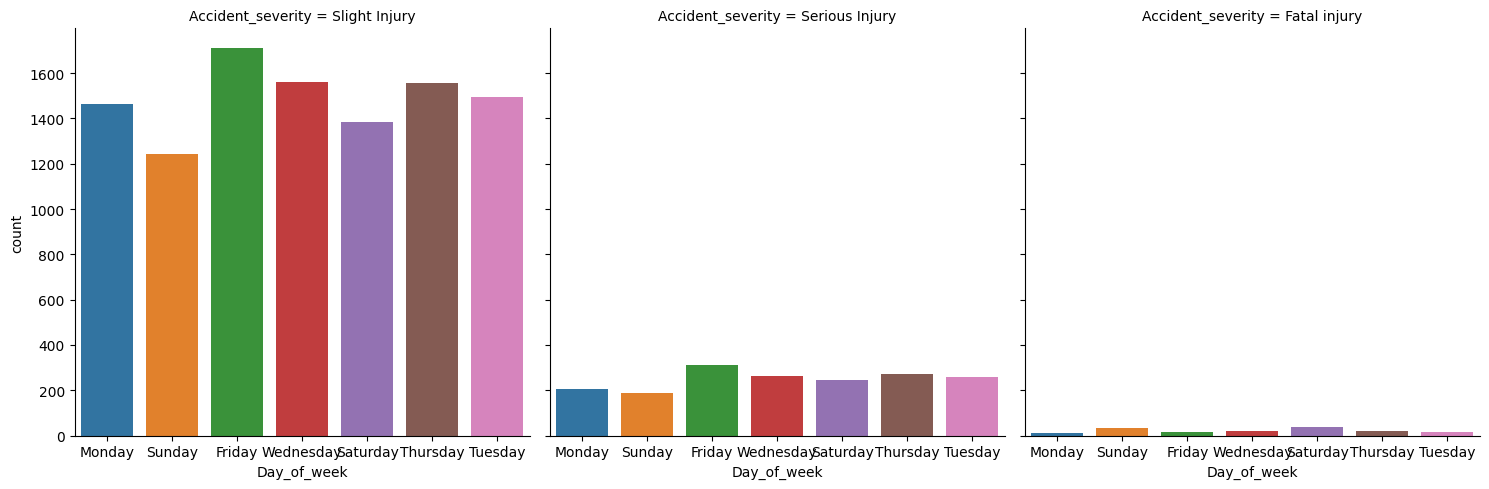

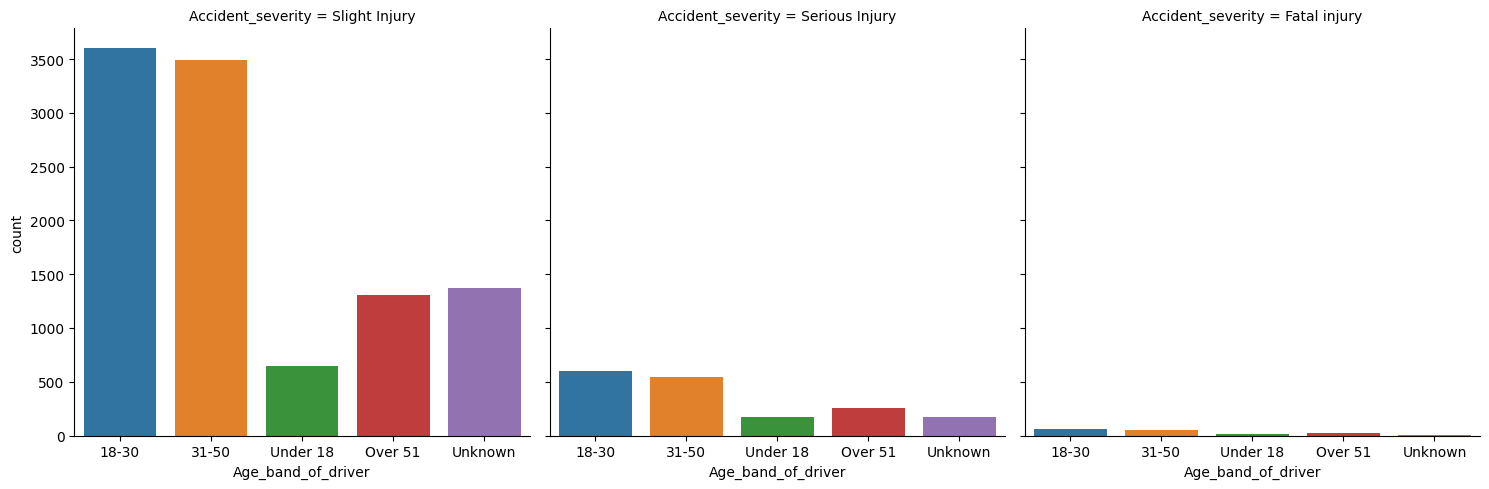

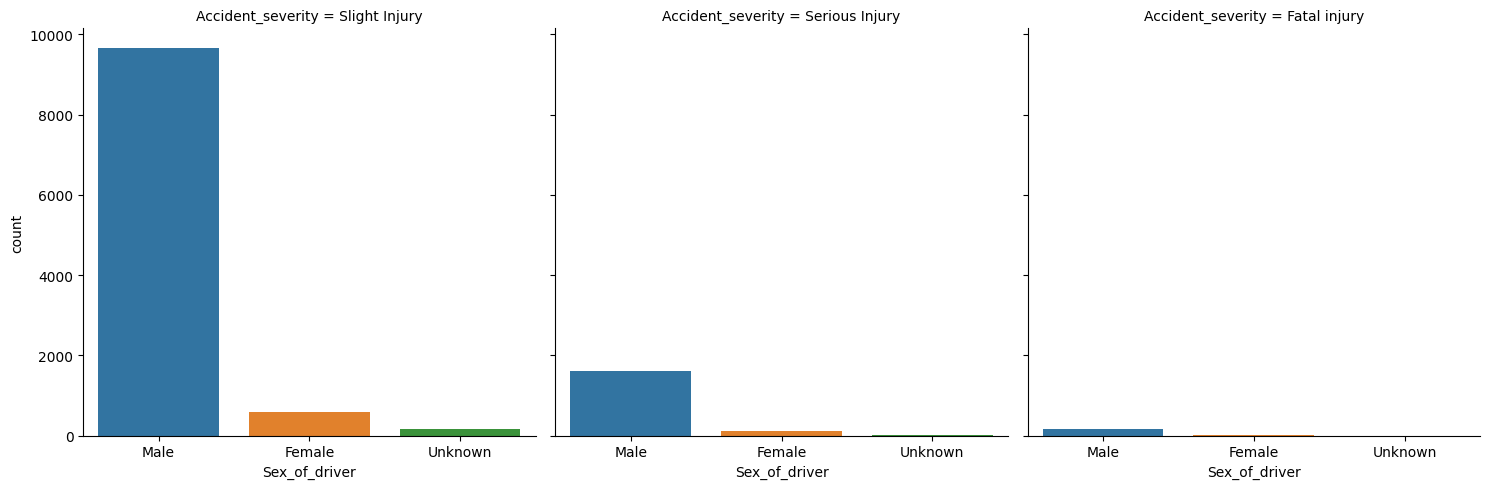

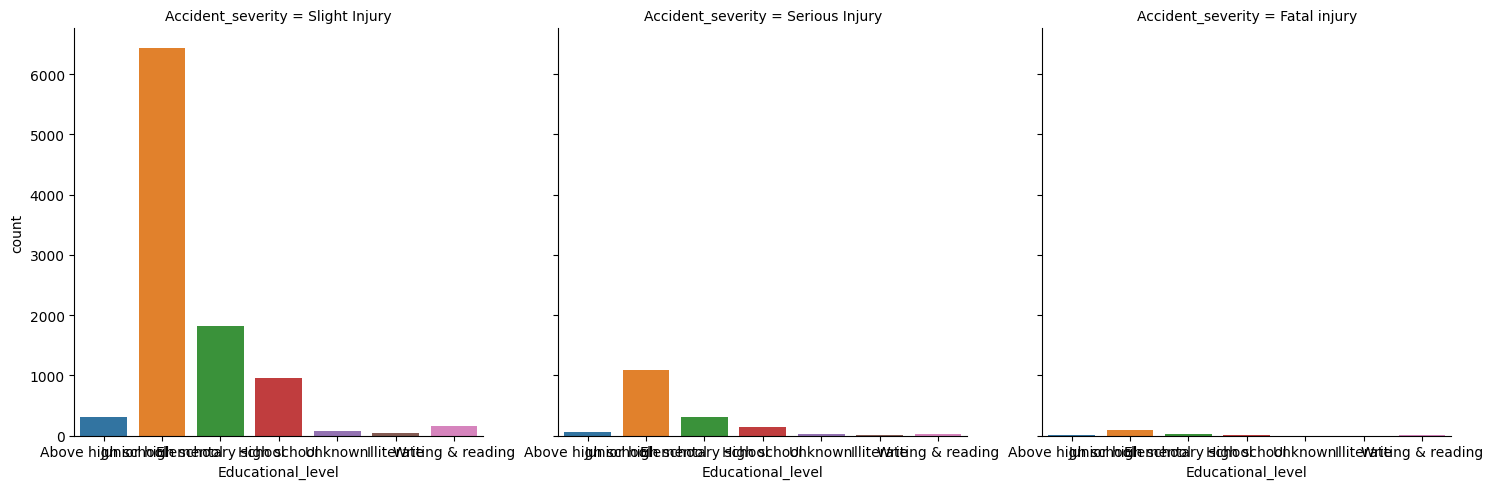

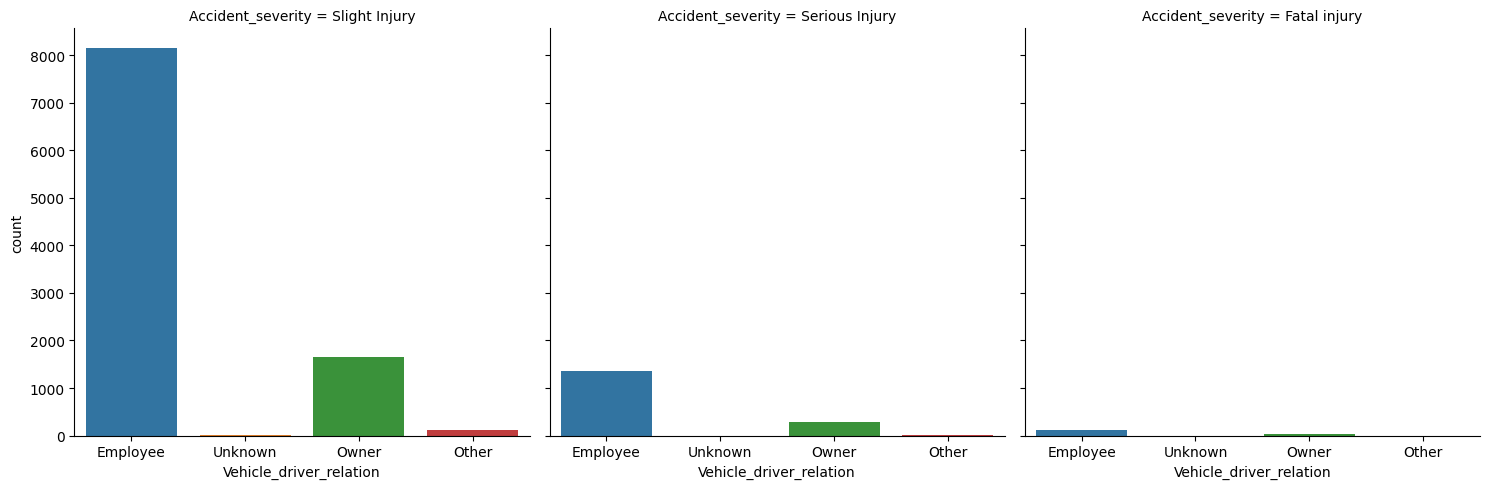

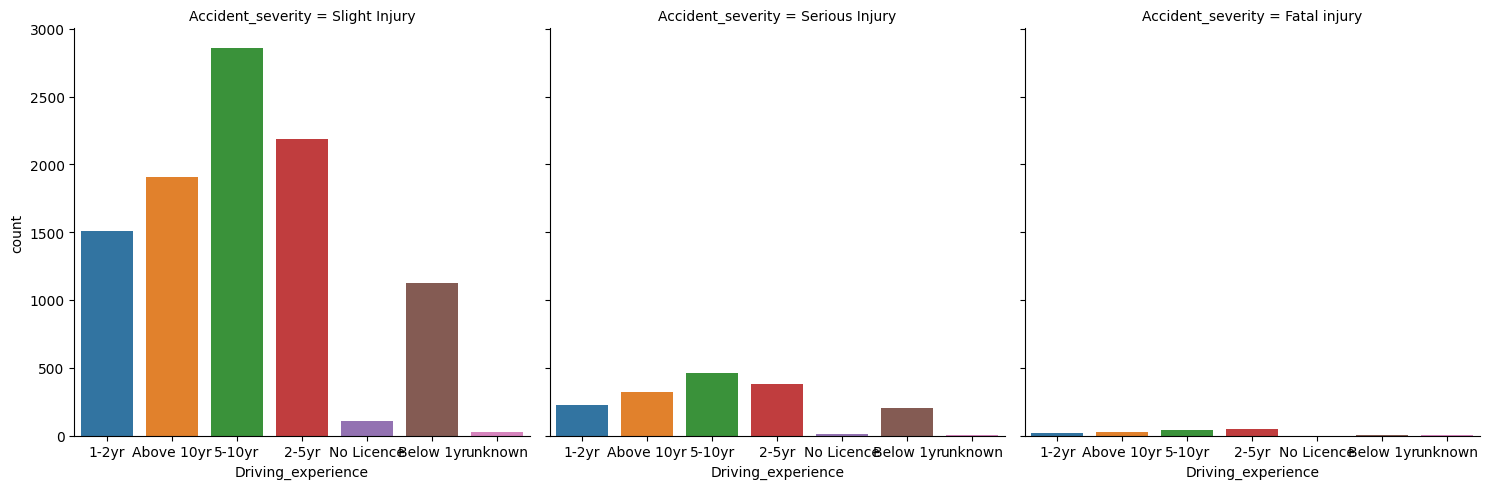

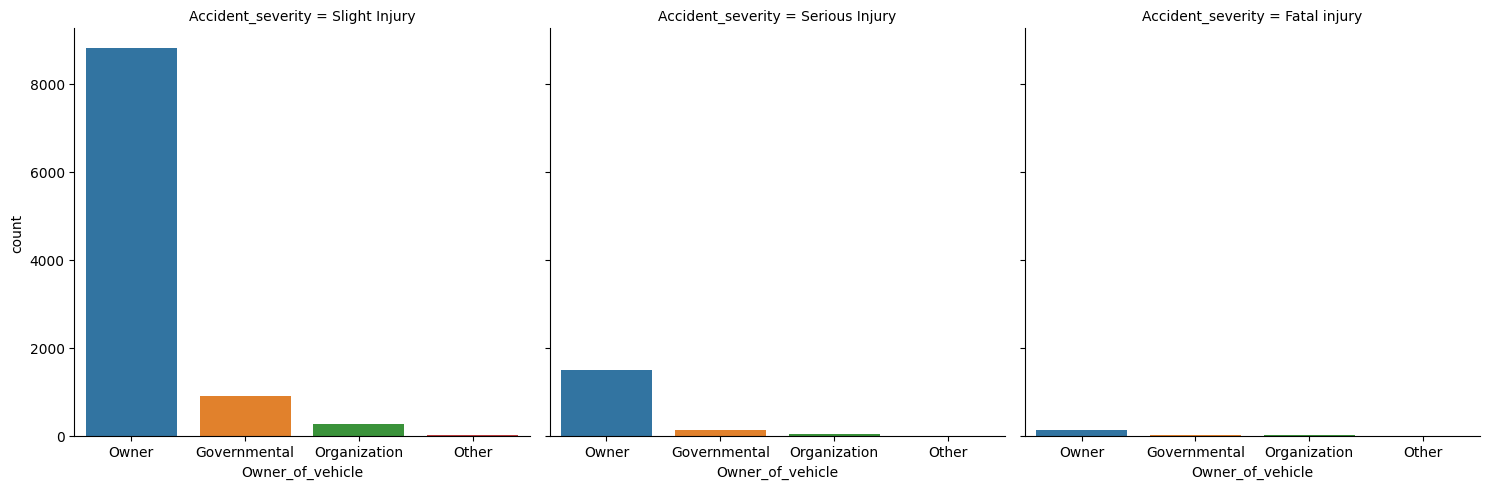

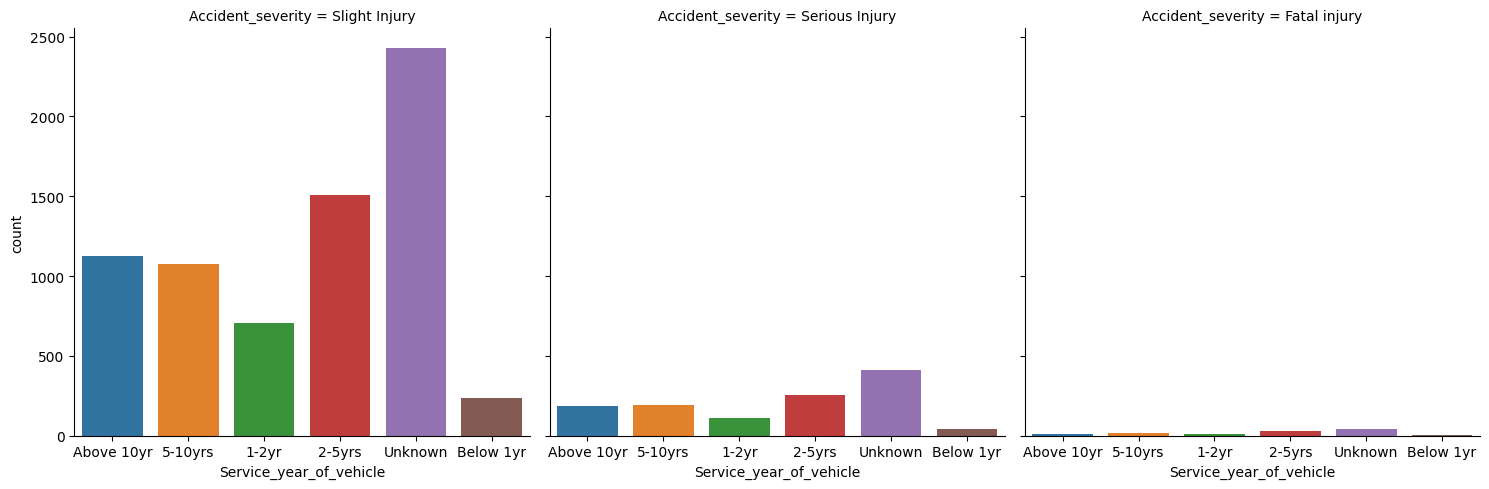

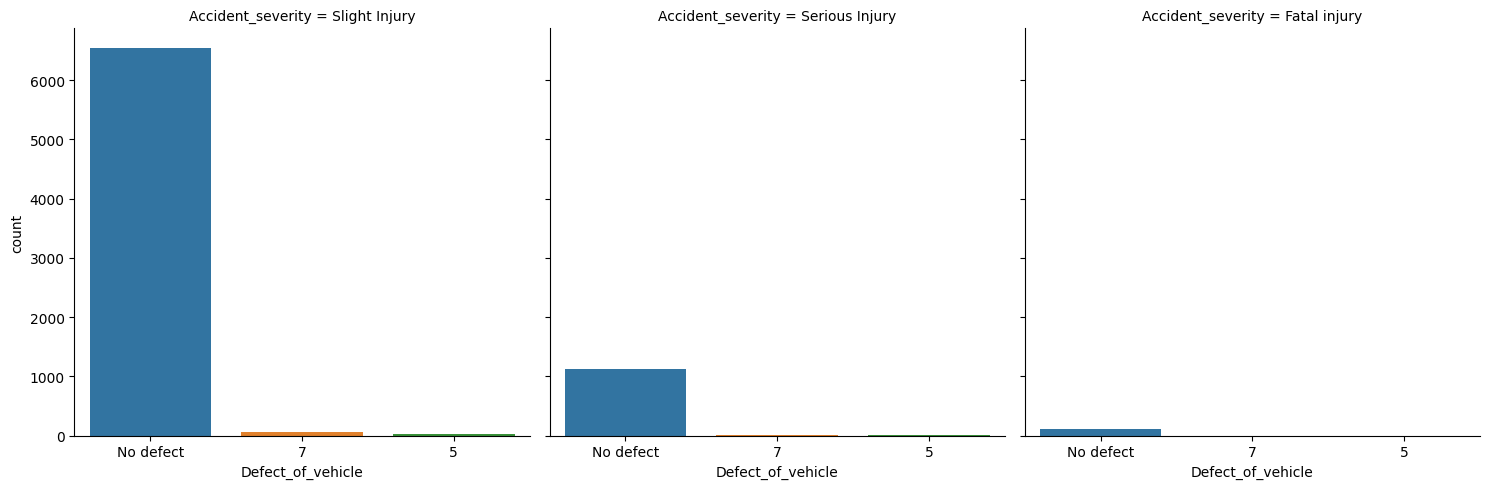

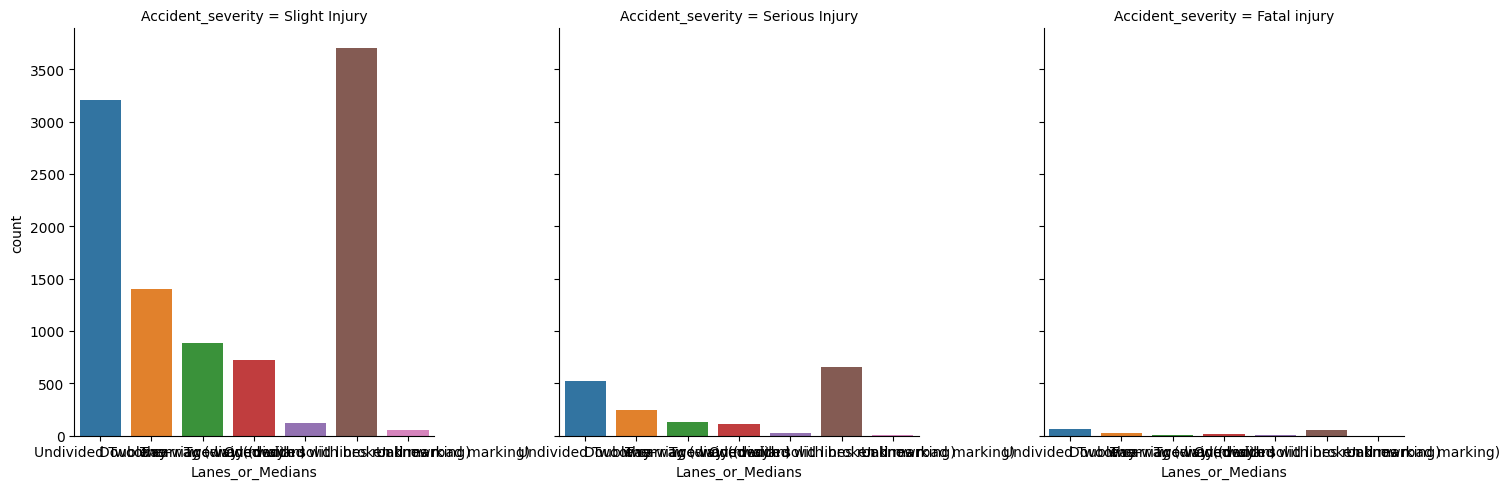

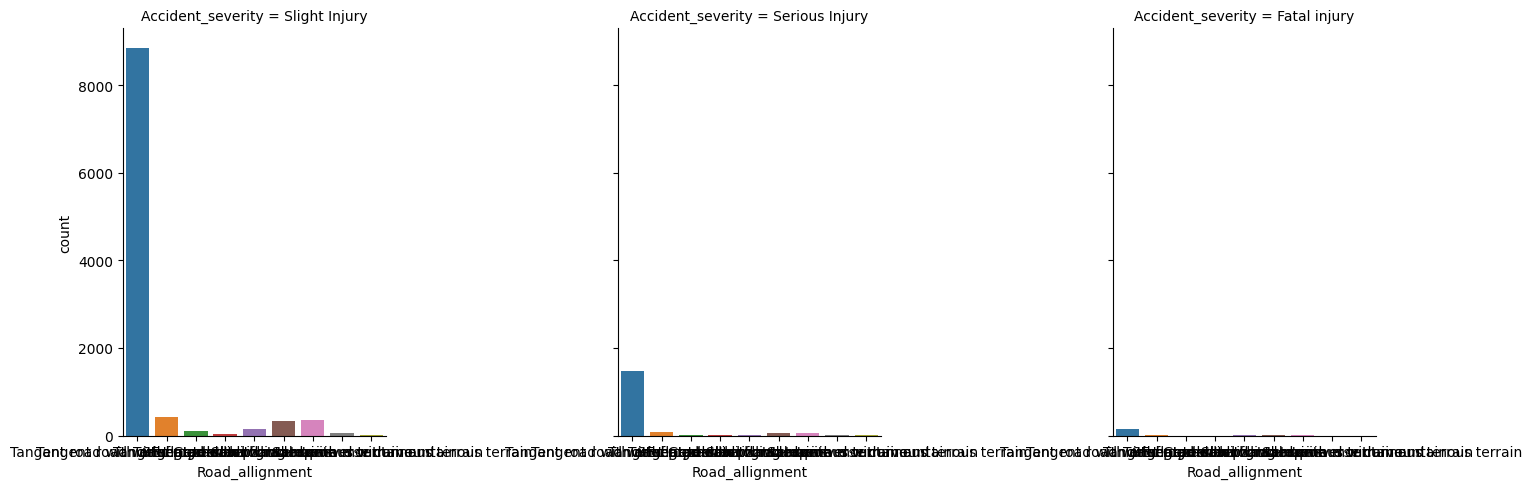

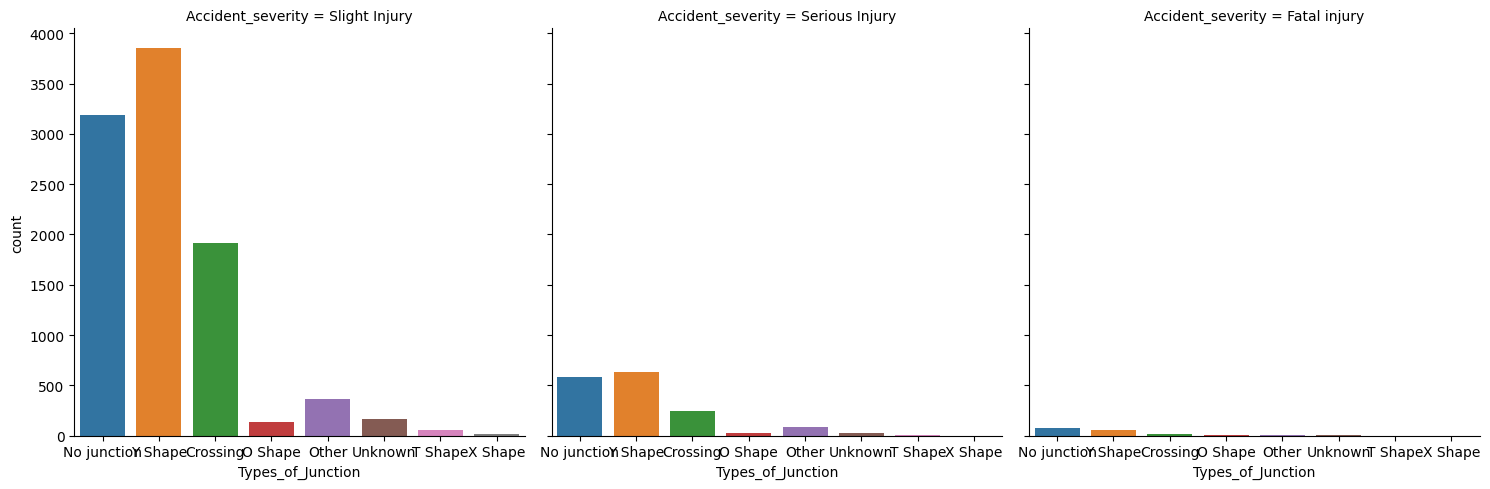

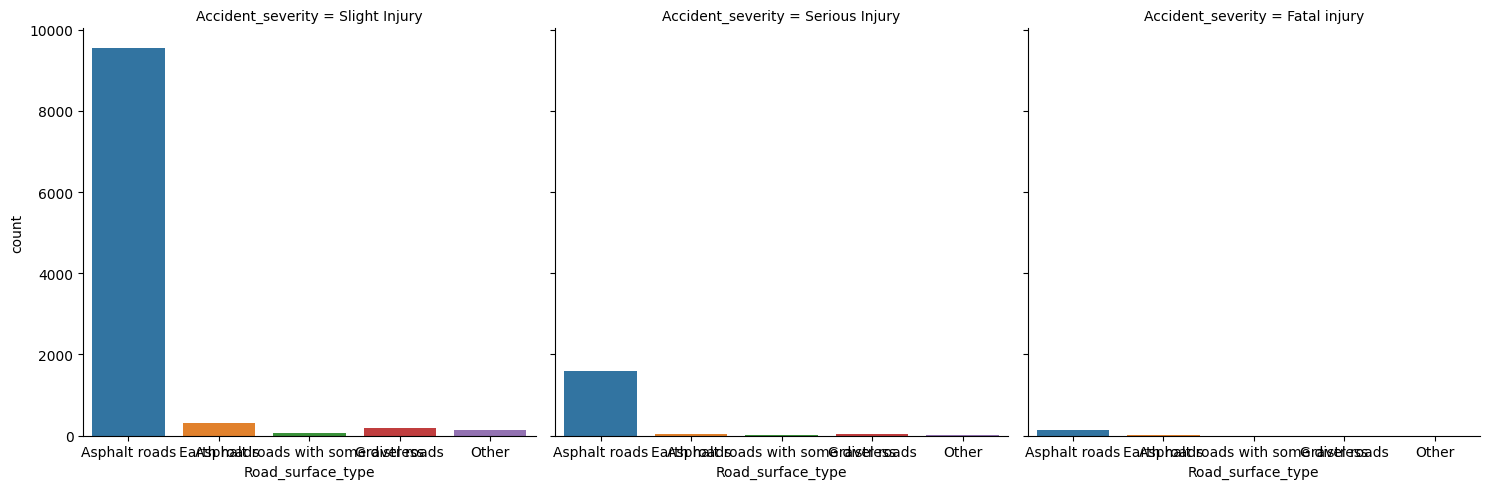

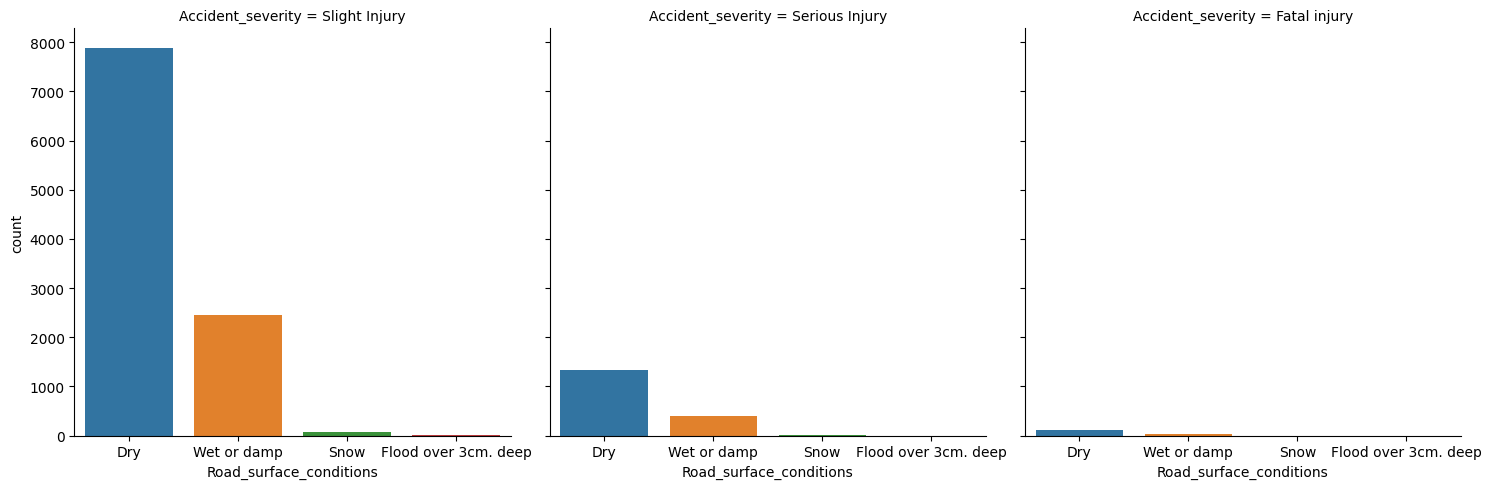

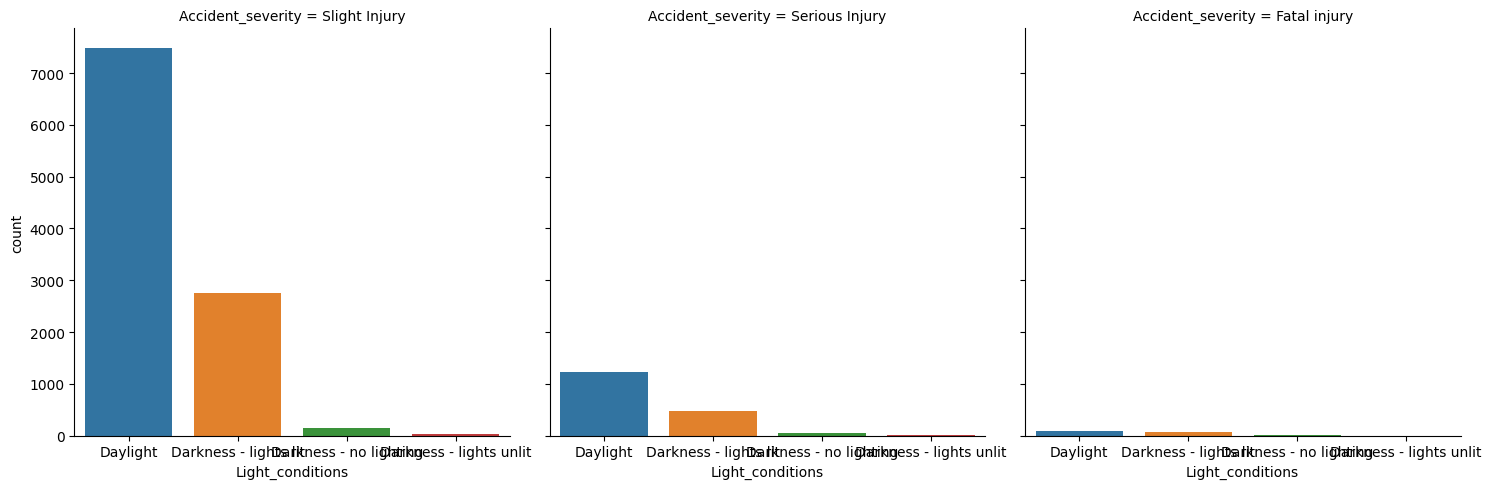

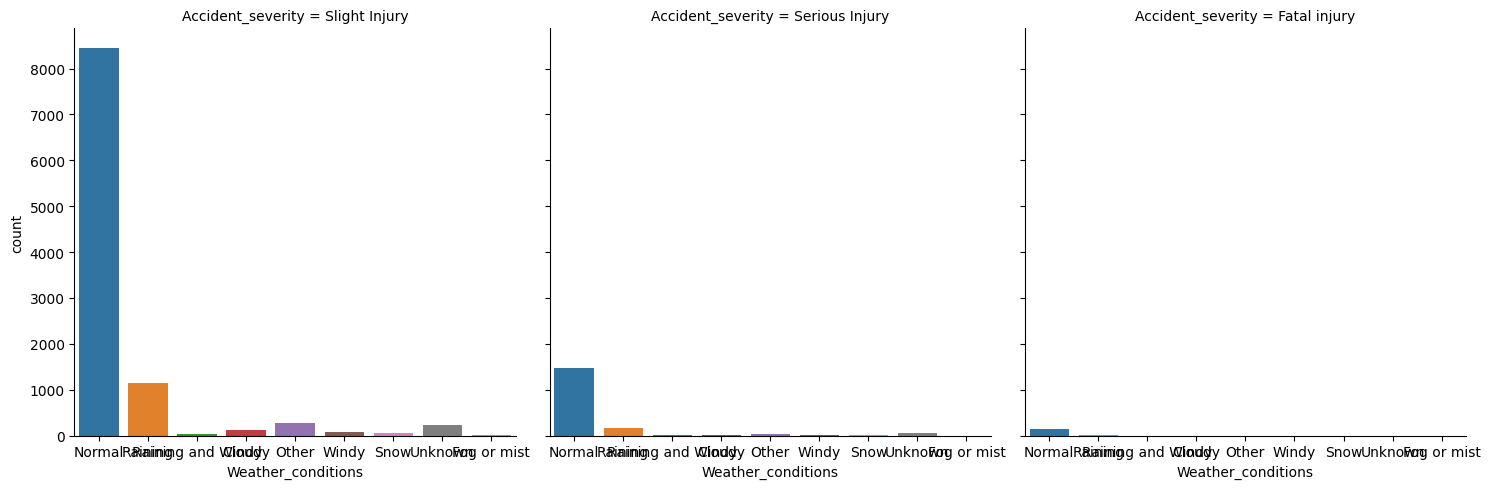

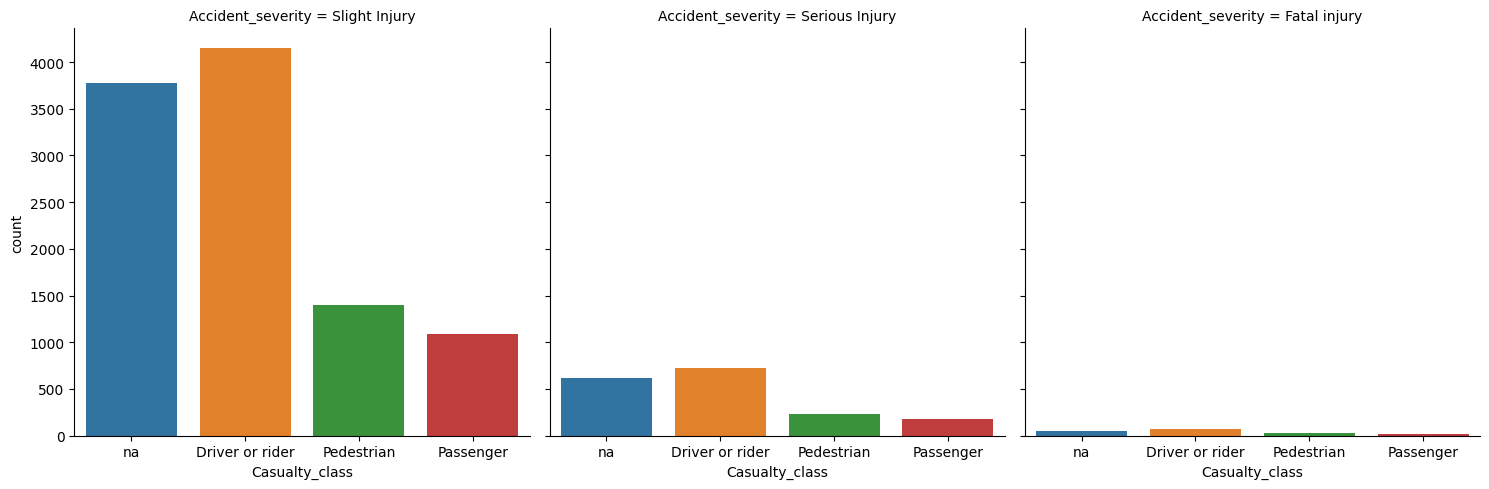

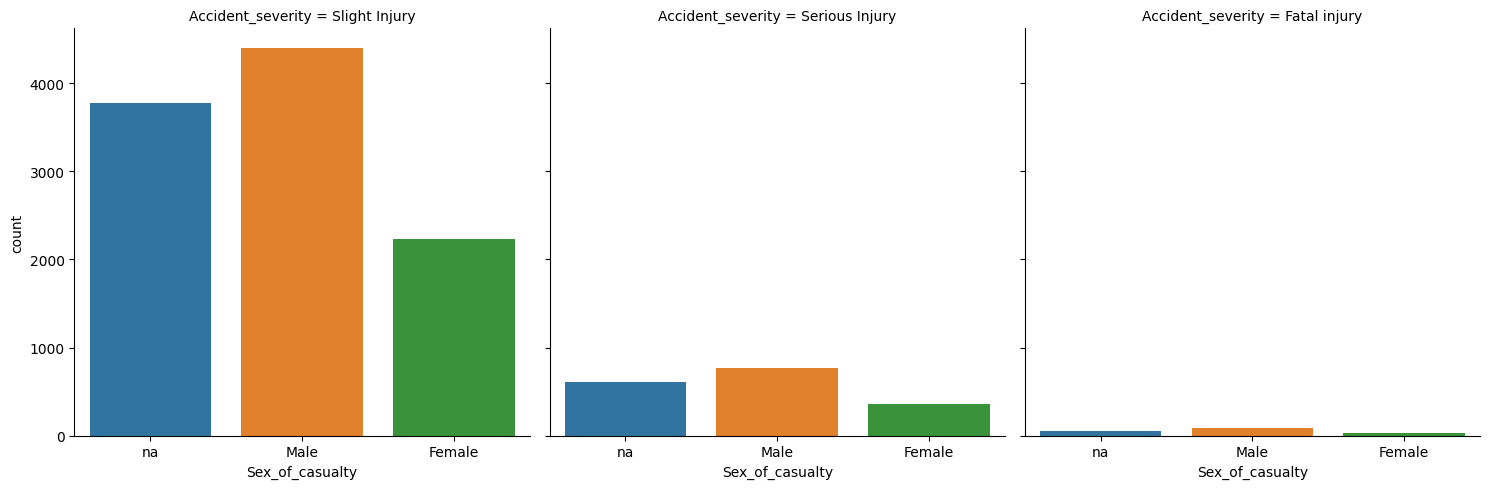

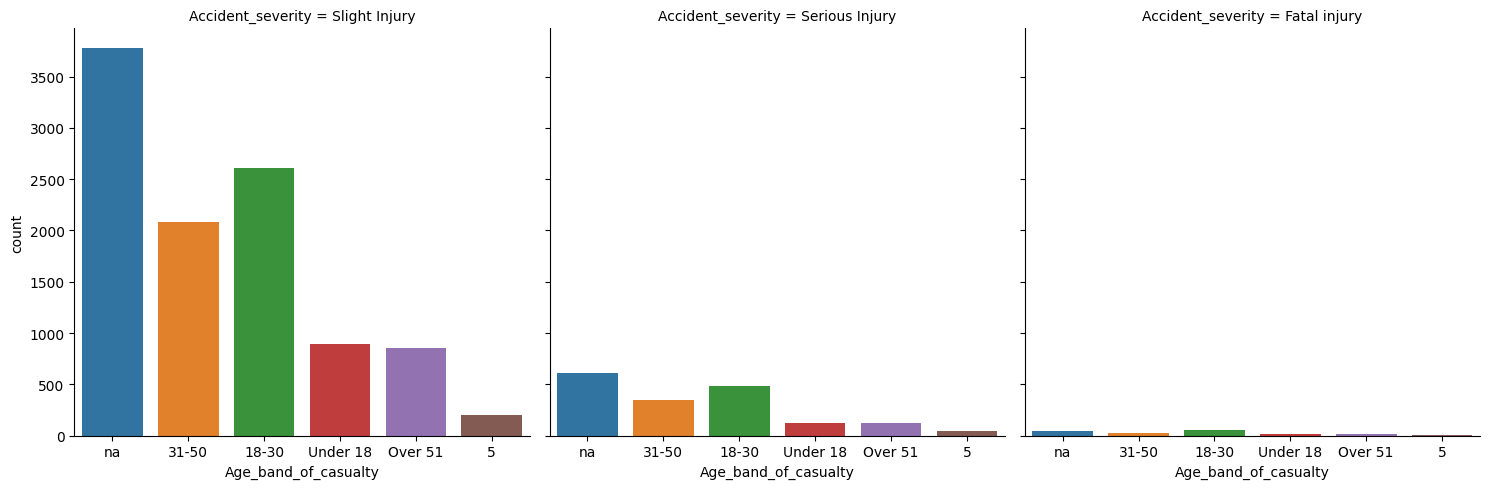

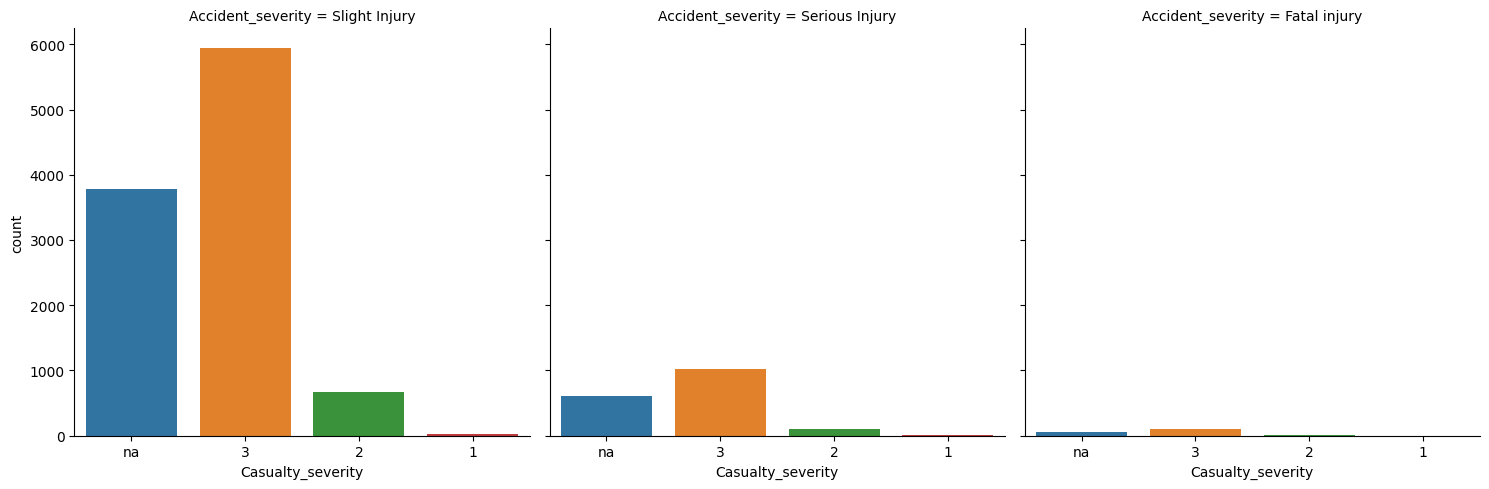

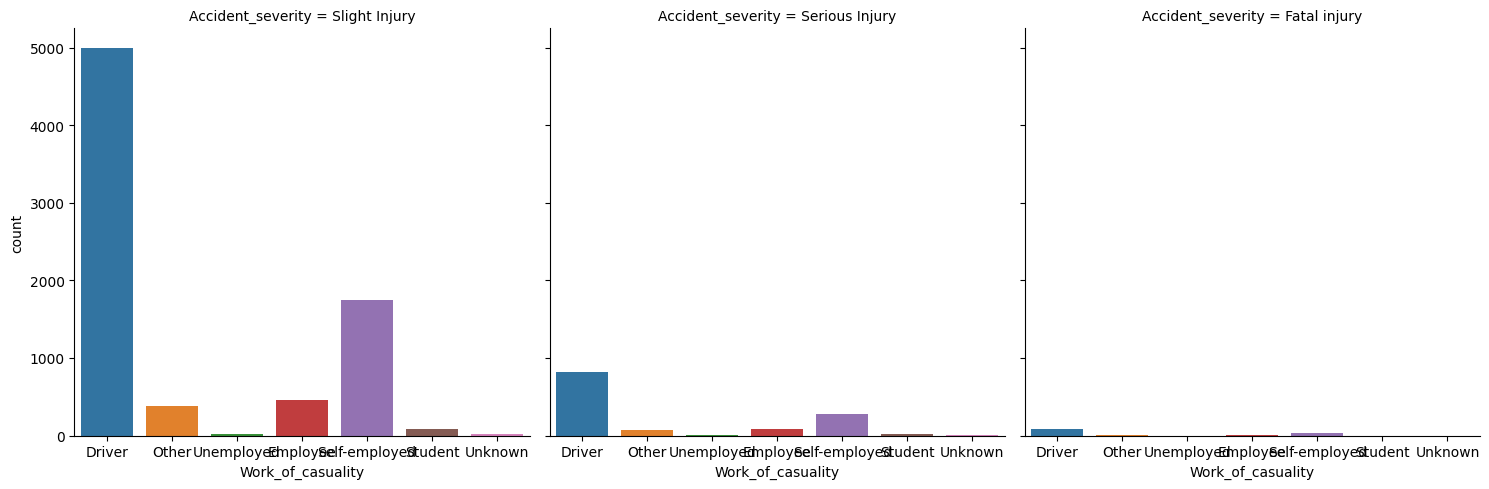

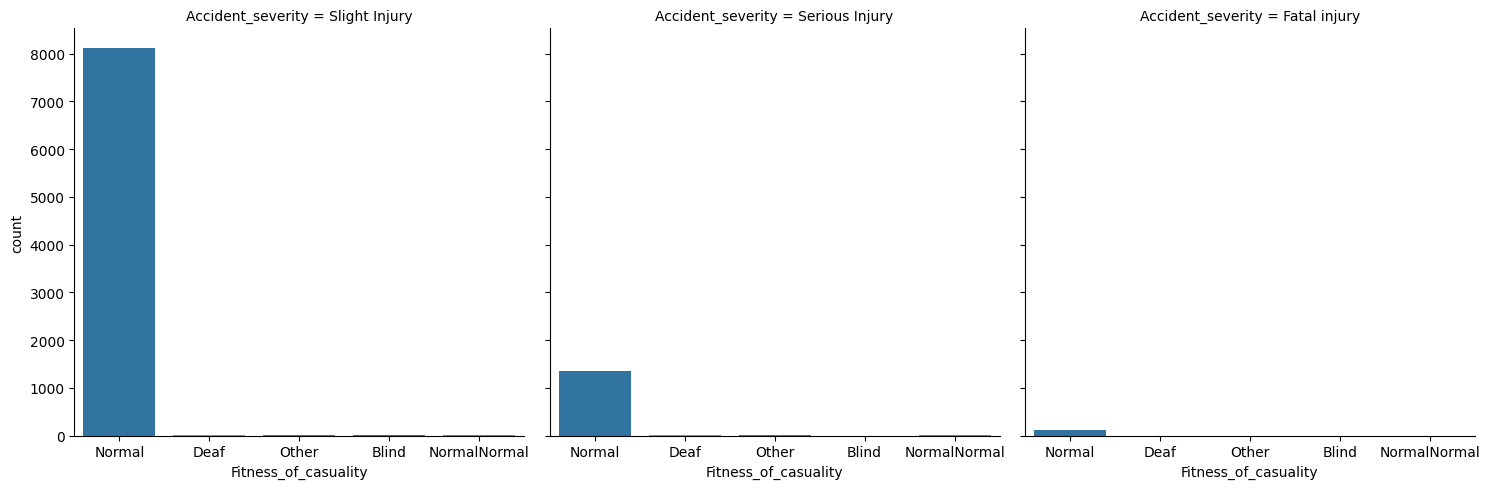

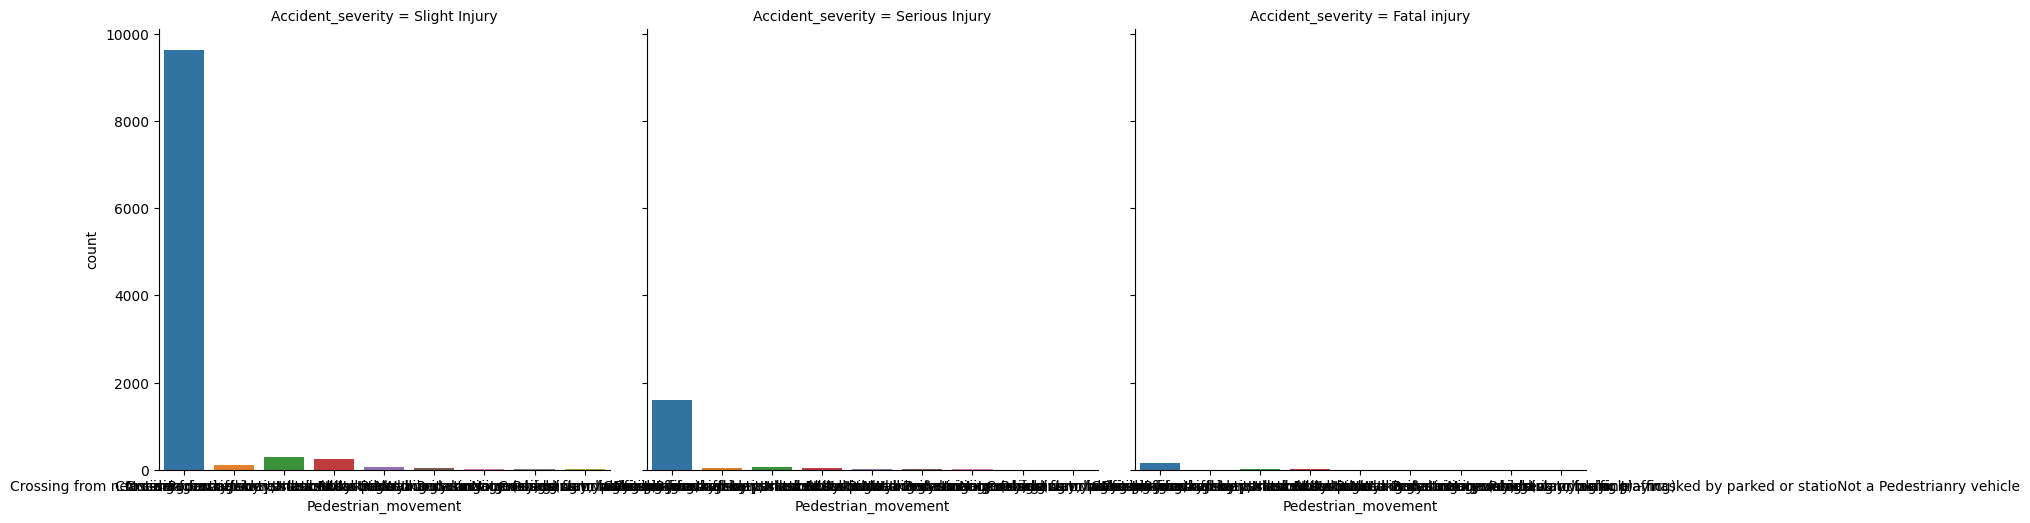

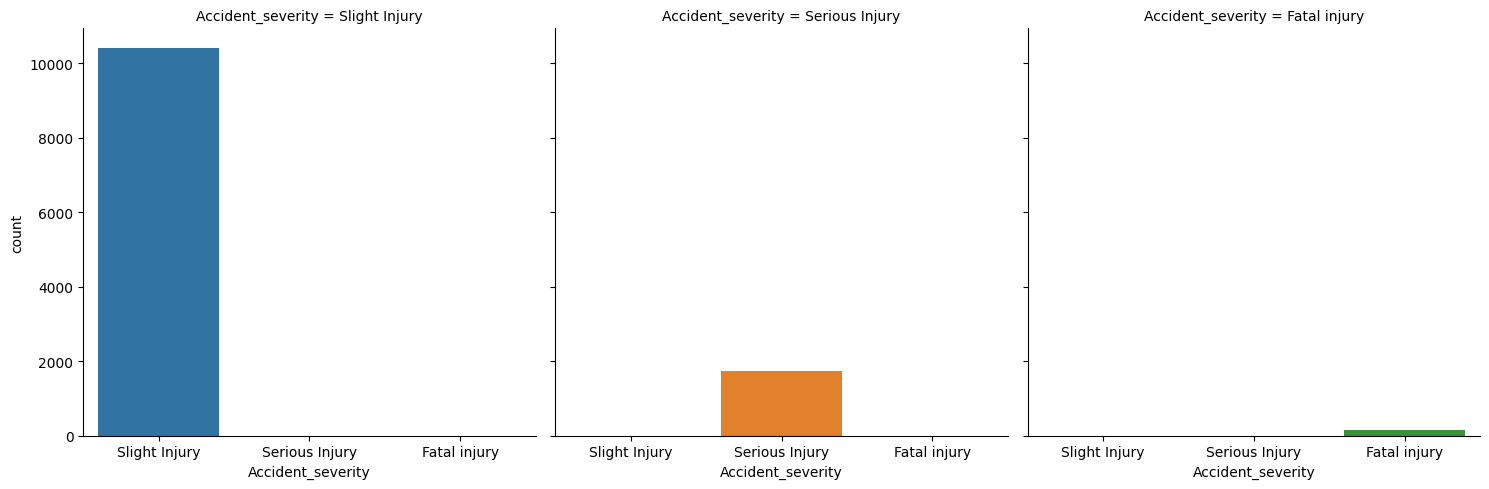

In [11]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique()<10:
        sns.catplot(x=col,col='Accident_severity',kind='count',data=df)